In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [4]:
df = pd.read_parquet('data_bronze/data_filtred.parquet')
df

,DATA_ACAO,TOTAL_POSTAGEM
0,2022-01-26,3689
1,2022-01-24,3529
2,2022-01-27,3443
3,2022-01-18,3337
4,2022-01-13,3294
...,...,...
1496,2022-08-13,404
1497,2022-08-21,309
1498,2022-08-06,303
1499,2022-08-28,184


In [5]:
df = df.sort_values(by='DATA_ACAO', ascending=True)
df

,DATA_ACAO,TOTAL_POSTAGEM
633,2020-03-01,48
612,2020-03-02,1713
606,2020-03-03,1906
613,2020-03-04,1644
619,2020-03-05,1534
...,...,...
583,2024-04-26,3920
597,2024-04-27,442
602,2024-04-28,169
578,2024-04-29,4589


In [6]:
df.set_index('DATA_ACAO', inplace=True)
df = df.resample('W').sum()
df

,TOTAL_POSTAGEM
DATA_ACAO,
2020-03-01,48
2020-03-08,10572
2020-03-15,8424
2020-03-22,12411
2020-03-29,8806
...,...
2024-04-07,18132
2024-04-14,21705
2024-04-21,21129


In [7]:
series_numpy = df['TOTAL_POSTAGEM'].to_numpy()
df['TOTAL_POSTAGEM'].dtypes

dtype('int64')

<Axes: xlabel='DATA_ACAO'>

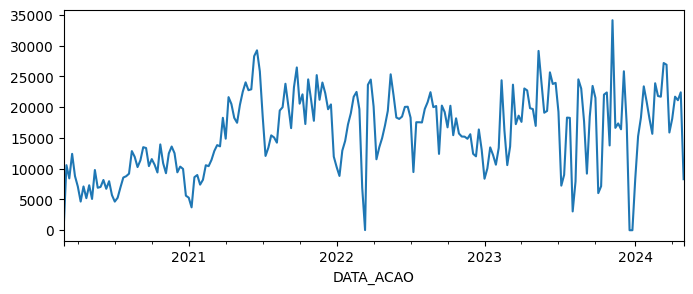

In [10]:
df['TOTAL_POSTAGEM'].plot(figsize=(8,3))

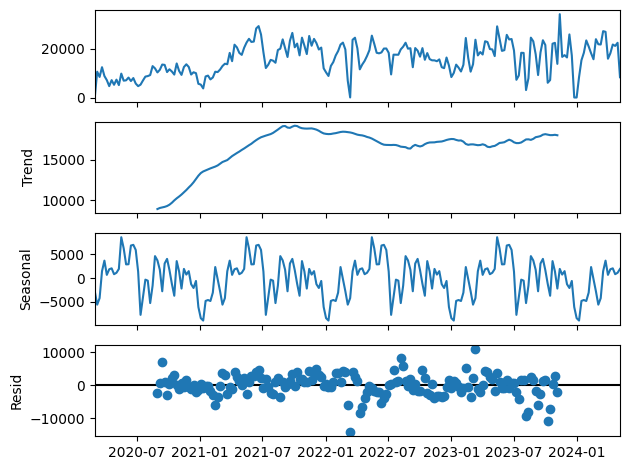

In [11]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(df, model='additive',period=52)
decomposition.plot()
plt.show()

TESTE DE ESTACIONARIEDADE

In [176]:
from statsmodels.tsa.stattools import adfuller

In [177]:
result = adfuller(df.dropna())
print(f'Teste ADF: {result[0]}')
print(f'p-valor: {result[1]}')

Teste ADF: -3.4968637197848764
p-valor: 0.00806800665450767


In [178]:
result = adfuller(df.diff().dropna())
print(f'Teste ADF: {result[0]}')
print(f'p-valor: {result[1]}')

Teste ADF: -14.751056835688438
p-valor: 2.4846569593881952e-27


In [179]:
from pmdarima import auto_arima
#from statsmodels.tsa.arima.model import ARIMA

fit_arima = auto_arima(
    df,
    d=1, 
    start_p=1, 
    start_q=1, 
    max_p=3, 
    max_q=3,
    seasonal=True,
    m=12,  # Periodicidade mensal
    D=1,
    start_P=1,
    start_Q=1,
    max_P=2,
    max_Q=2,
    information_criterion='aic',
    trace=True,
    error_action='ignore',
    stepwise=True
)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(1,1,1)[12]             : AIC=inf, Time=5.67 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=4279.818, Time=0.06 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=4216.558, Time=1.36 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=1.47 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=4276.186, Time=0.08 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=4204.301, Time=0.94 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=5.65 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=2.73 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=4187.942, Time=0.74 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=4207.807, Time=0.63 sec
 ARIMA(0,1,0)(2,1,1)[12]             : AIC=inf, Time=7.36 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=inf, Time=1.85 sec
 ARIMA(0,1,1)(2,1,0)[12]             : AIC=4187.000, Time=1.40 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=4181.257, Time=1.09 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=4256.6

In [180]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Ajuste do modelo SARIMAX com os parâmetros obtidos
model = SARIMAX(df, 
                order=(1, 1, 2), 
                seasonal_order=(2, 1, 0, 12))

# Ajustando o modelo
resultado_sarimax = model.fit()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            6     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  9.48845D+00    |proj g|=  2.47265D-02


 This problem is unconstrained.



At iterate    5    f=  9.48590D+00    |proj g|=  4.47828D-04

At iterate   10    f=  9.48589D+00    |proj g|=  6.43995D-05

At iterate   15    f=  9.48589D+00    |proj g|=  3.13594D-04

At iterate   20    f=  9.48574D+00    |proj g|=  5.89369D-03

At iterate   25    f=  9.46956D+00    |proj g|=  5.60066D-02

At iterate   30    f=  9.42342D+00    |proj g|=  7.13932D-03

At iterate   35    f=  9.42287D+00    |proj g|=  9.12095D-03

At iterate   40    f=  9.42277D+00    |proj g|=  2.40609D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    6     40     43      1     0     0   2.406D-05   9.423D+00
  F =   9.42276758928

In [181]:
# resultados do modelo SARIMAX(1,1,2)
resultado_sarimax.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                      TOTAL_POSTAGEM   No. Observations:                  219
Model:             SARIMAX(1, 1, 2)x(2, 1, [], 12)   Log Likelihood               -2063.586
Date:                             Thu, 30 May 2024   AIC                           4139.172
Time:                                     18:27:11   BIC                           4159.139
Sample:                                 03-01-2020   HQIC                          4147.248
                                      - 05-05-2024                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1248      0.173      0.720      0.471      -0.215       0.465
ma.L1         -0.4926      0.172     -2.869      0.004      -0.829      -0.156
ma.L2         -0.3358      0.122     -2.763      0.006      -0.574      -0.098
ar.S.L12      -0.7801      0.069    -11.341      0.000      -0.915      -0.645
ar.S.L24      -0.3261      0.077     -4.211      0.000      -0.478      -0.174
sigma2      2.917e+07   8.44e-09   3.45e+15      0.000    2.92e+07    2.92e+07
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                21.99
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               3.89   Skew:                             0.32
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.46
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.07e+31. Standard errors may be unstable.
"""

In [183]:
# Vamos realizar um "backtesting" com predições de valores dos 12 meses anteriores
predicoes = resultado_sarimax.get_prediction(start=-12)
predicao_media = predicoes.predicted_mean

In [186]:
# intervalo de confiança

intervalo_confianca = predicoes.conf_int()
limites_abaixo = intervalo_confianca.iloc[:,0]
limites_acima = intervalo_confianca.iloc[:,1]

limites_abaixo[0], predicao_media[0], limites_acima[0]

/tmp/ipykernel_13637/2540818377.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  limites_abaixo[0], predicao_media[0], limites_acima[0]


(8710.480238954018, 19295.313337461932, 29880.146435969844)

In [187]:
datas_previsao = np.asarray(predicao_media.index)
datas = np.asarray(df.index)

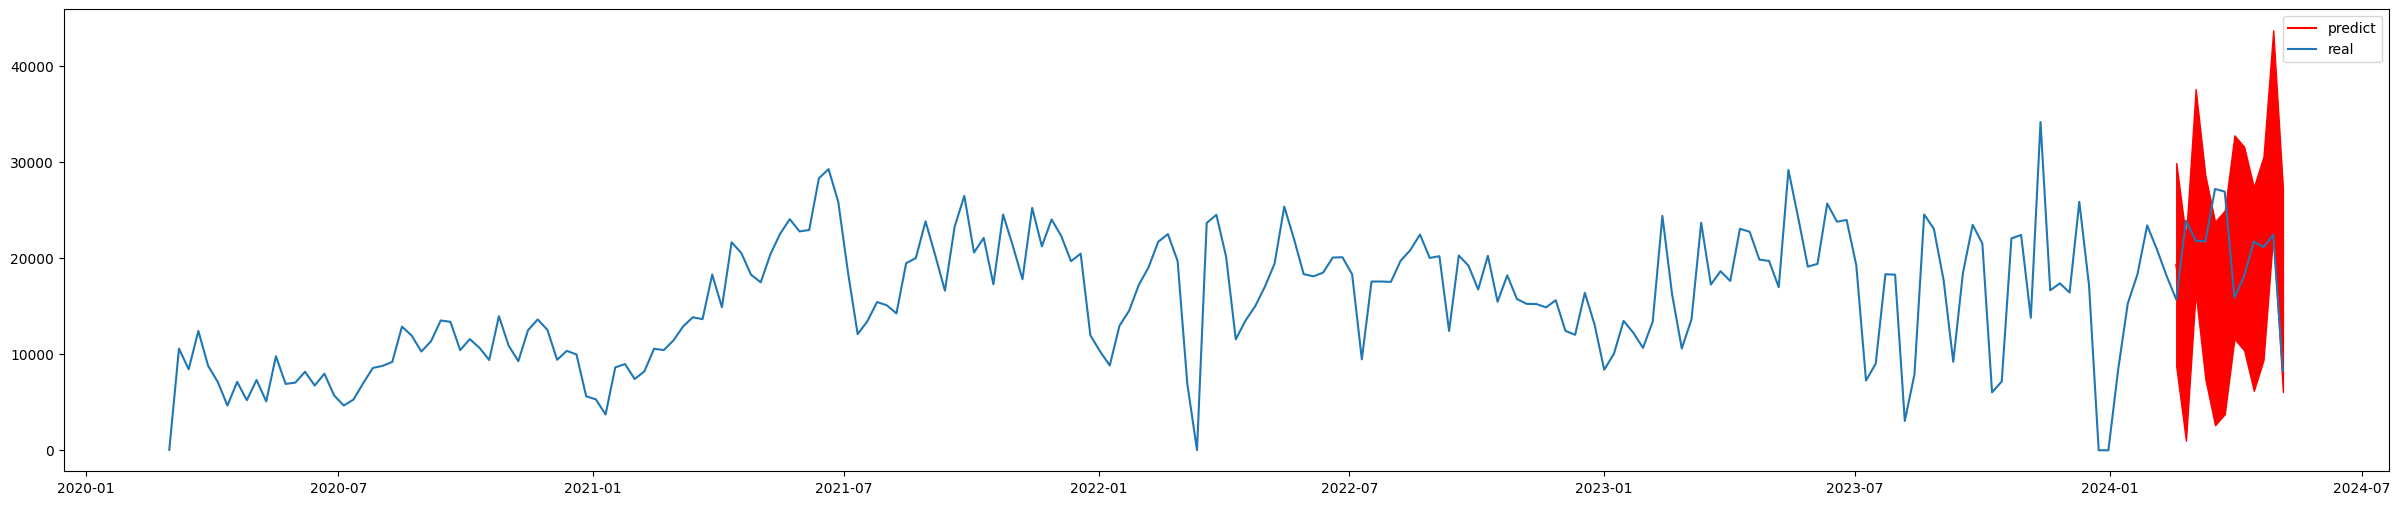

In [188]:
plt.figure(figsize=(30,6))
plt.plot(datas_previsao, predicao_media.values, color='red', label='predict')
plt.fill_between(datas_previsao, limites_abaixo, limites_acima, color='red')
plt.plot(datas, df.values,label='real')
plt.legend()
plt.show()

In [189]:
from sklearn.metrics import mean_squared_error
from math import sqrt

In [190]:
rmse_sarima = sqrt(mean_squared_error(df[-12:].values, predicao_media.values))
print(rmse_sarima)

8242.760302688544


In [191]:
forecast = resultado_sarimax.get_forecast(steps=12)
forecast_medio = forecast.predicted_mean
forecast_medio.size

12

In [192]:
intervalo_confianca_forecast = forecast.conf_int()
intervalo_abaixo_f = intervalo_confianca_forecast.iloc[:,0]
intervalo_acima_f = intervalo_confianca_forecast.iloc[:,1]

intervalo_abaixo_f[10],forecast_medio[10] ,intervalo_acima_f[10]

/tmp/ipykernel_13637/556646221.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  intervalo_abaixo_f[10],forecast_medio[10] ,intervalo_acima_f[10]


(11984.365435278918, 26078.352568078764, 40172.33970087861)

In [198]:
datas_forecast = np.asarray(forecast_medio.index)
datas_previsao = np.asarray(predicao_media.index)



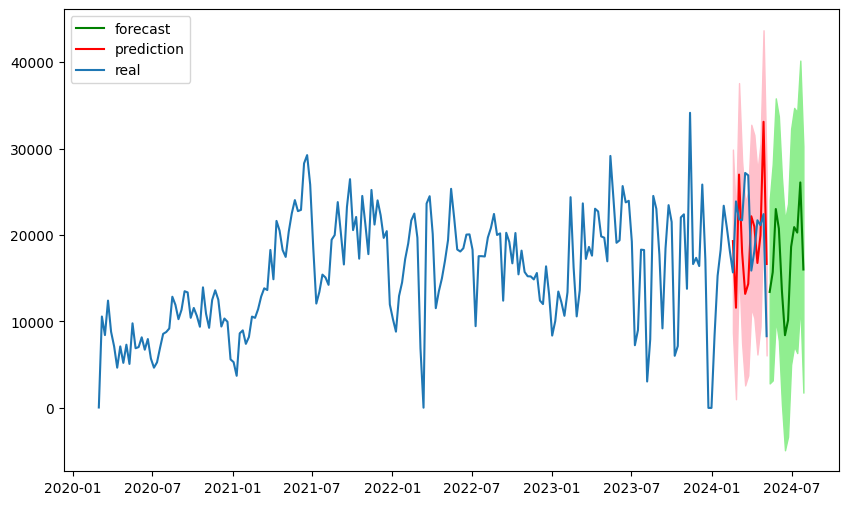

In [195]:
dates=np.asarray(df.index)
plt.figure(figsize=(10,6))
plt.plot(datas_forecast,forecast_medio.values,color='green',label='forecast')
plt.fill_between(datas_forecast, intervalo_abaixo_f, intervalo_acima_f, color='lightgreen')

plt.plot(datas_previsao,predicao_media.values,color='red',label='prediction')
plt.fill_between(datas_previsao, limites_abaixo, limites_acima, color='pink')

plt.plot(dates,df.values, label='real')
plt.legend(loc='upper left')
plt.show()

In [207]:
data = {
    'intervalo_abaixo_f': intervalo_abaixo_f,
    'forecast_medio': forecast_medio.values,
    'intervalo_acima_f': intervalo_acima_f,
    'predicao_media': predicao_media.values,
}

df_plot = pd.DataFrame(data)
df_plot


,intervalo_abaixo_f,forecast_medio,intervalo_acima_f,predicao_media
2024-05-12,2830.904682,13415.737781,24000.570879,19295.313337
2024-05-19,3177.385565,15700.178910,28222.972255,11586.652811
2024-05-26,10202.554225,23002.945444,35803.336663,26988.193466
2024-06-02,7759.576479,20738.763811,33717.951144,18010.006559
2024-06-09,370.719818,13516.143437,26661.567055,13186.586303
2024-06-16,-4900.396311,8407.958808,21716.313926,14342.154762
2024-06-23,-3330.133487,10139.031137,23608.195761,22165.098069
2024-06-30,5002.905762,18630.963837,32259.021913,20978.995947
2024-07-07,7128.641356,20913.759225,34698.877093,16763.290139
2024-07-14,6340.733183,20281.141156,34221.549130,19977.865184
